In [15]:
import scvi
import scanpy as sc
import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

Note: preprocessing should be improved in real use case. Very basic preprocessing below. e.g., add doublet removal, etc

# dedifferentiation

In [4]:
ls dedif_data

GSM3195648_D0_Dox_C1_gene_bc_mat.h5
GSM3195649_D0_Dox_C2_gene_bc_mat.h5
GSM3195650_D0.5_Dox_C1_gene_bc_mat.h5
GSM3195651_D0.5_Dox_C2_gene_bc_mat.h5
GSM3195652_D1_Dox_C1_gene_bc_mat.h5
GSM3195653_D1_Dox_C2_gene_bc_mat.h5
GSM3195654_D1.5_Dox_C1_gene_bc_mat.h5
GSM3195655_D1.5_Dox_C2_gene_bc_mat.h5
GSM3195656_D2_Dox_C1_gene_bc_mat.h5
GSM3195657_D2_Dox_C2_gene_bc_mat.h5
GSM3195658_D2.5_Dox_C1_gene_bc_mat.h5
GSM3195659_D2.5_Dox_C2_gene_bc_mat.h5
GSM3195660_D3_Dox_C1_gene_bc_mat.h5
GSM3195661_D3_Dox_C2_gene_bc_mat.h5
GSM3195662_D3.5_Dox_C1_gene_bc_mat.h5
GSM3195663_D3.5_Dox_C2_gene_bc_mat.h5
GSM3195664_D4_Dox_C1_gene_bc_mat.h5
GSM3195665_D4_Dox_C2_gene_bc_mat.h5
GSM3195666_D4.5_Dox_C1_gene_bc_mat.h5
GSM3195667_D4.5_Dox_C2_gene_bc_mat.h5
GSM3195668_D5_Dox_C1_gene_bc_mat.h5
GSM3195669_D5_Dox_C2_gene_bc_mat.h5
GSM3195670_D5.5_Dox_C1_gene_bc_mat.h5
GSM3195671_D5.5_Dox_C2_gene_bc_mat.h5
GSM3195672_D6_Dox_C1_gene_bc_mat.h5
GSM3195673_D6_Dox_C2_gene_bc_mat.h5
GSM3195674_D6.5_Dox_C1_gene_bc_mat.h5
GS

In [61]:
days = dict(zip([x.split('_')[0] for x in files]
    ,[float(x.split('_')[1].replace('D','').replace('iPSC', '20')) for x in files]))

In [7]:
files = os.listdir('dedif_data/')

In [13]:
#removing serum and C2 to keep number of cells down
files = [x for x in files if ('2i' in x or 'Dox' in x) and '_C1_' in x]

In [36]:
def pp(path):
    adata = sc.read_10x_h5(path)
    adata.var_names_make_unique()
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    
    adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
    adata.obs['Sample'] = path.split('/')[1].split('_')[0]
    
    return adata

In [37]:
datas = []
for file in files:
    datas.append(pp('dedif_data/' + file))

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_5164/2037910013.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_5164/2037910013.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them uniqu

/tmp/ipykernel_5164/2037910013.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_5164/2037910013.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_5164/2037910013.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_5164/2037910013.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('_')[1].replace('D','')


In [38]:
adata = sc.concat(datas, index_unique = '_')

In [39]:
sc.pp.filter_genes(adata, min_cells = 100)

adata.layers['counts'] = adata.X.copy()

scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['total_counts'])


model = scvi.model.SCVI(adata)

In [47]:
model.train() 

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 89/89: 100%|██████| 89/89 [22:05<00:00, 14.90s/it, loss=7.05e+03, v_num=1]


In [48]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [63]:
adata.obs['Day'] = adata.obs.Sample.map(days)

In [64]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Day,Sample,_scvi_batch,_scvi_labels
AAACCTGGTAAATGTG-1_0,2881,2881,10097.0,11.5,GSM3195714,0,0
AAACGGGCAGACGCAA-1_0,5107,5107,35162.0,11.5,GSM3195714,0,0
AAAGATGCAACAACCT-1_0,3472,3472,20262.0,11.5,GSM3195714,0,0
AAAGATGCACGAAAGC-1_0,2073,2073,5480.0,11.5,GSM3195714,0,0
AAAGATGTCTCAAGTG-1_0,1713,1713,6286.0,11.5,GSM3195714,0,0
...,...,...,...,...,...,...,...
TTTGGTTTCGTTGCCT-1_39,2184,2184,7659.0,8.0,GSM3195680,0,0
TTTGTCAAGGCACATG-1_39,2626,2626,12497.0,8.0,GSM3195680,0,0
TTTGTCAAGGCTAGGT-1_39,1694,1694,6577.0,8.0,GSM3195680,0,0
TTTGTCATCAAGATCC-1_39,1634,1634,5856.0,8.0,GSM3195680,0,0


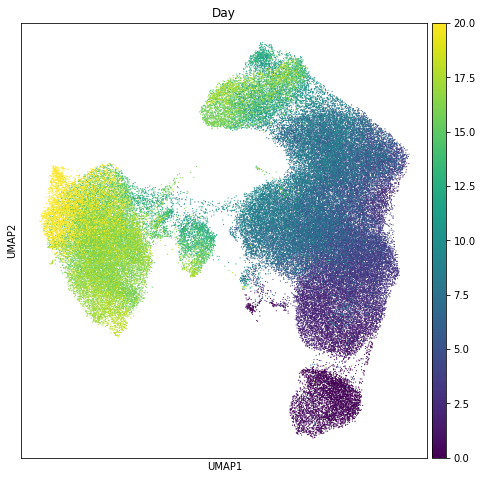

In [72]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = 'Day', s = 5)

In [74]:
adata.write_h5ad('data_saved/scvi_dedif.h5ad')

# CD16 removed

In [1]:
import scvi
import scanpy as sc
import os
import numpy as np
from matplotlib.pyplot import rc_context

Global seed set to 0


In [3]:
dirs = os.listdir('pbmc_cd16/')
dirs = [x for x in dirs if 'csv' not in x]
dirs

['MH8919332',
 'MH8919178',
 'MH8919283',
 'MH8919333',
 'MH8919179',
 'MH8919177',
 'MH8919227',
 'MH8919176',
 'MH8919282',
 'MH8919226',
 'newcastle65',
 'newcastle74']

In [102]:
def pp(path):
    adata = sc.read_10x_mtx(path)
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    
    adata.obs['Sample'] = path.split('/')[1]
    
    return adata

In [7]:
datas = [pp('pbmc_cd16/' + x) for x in dirs]

/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attrib

In [9]:
adata = sc.concat(datas)

In [10]:
adata

AnnData object with n_obs × n_vars = 61728 × 24929
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'Sample'

In [11]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Sample
AAACCTGAGACAGAGA-MH8919332,997,997,3796.0,MH8919332
AAACCTGAGAGAGCTC-MH8919332,1124,1124,3439.0,MH8919332
AAACCTGAGCAGGTCA-MH8919332,901,901,3550.0,MH8919332
AAACCTGAGCTCCTTC-MH8919332,1966,1966,8749.0,MH8919332
AAACCTGAGTCAAGGC-MH8919332,1057,1057,3985.0,MH8919332
...,...,...,...,...
TTTGTCAGTAGCTAAA-newcastle74,1451,1451,3687.0,newcastle74
TTTGTCATCATGTAGC-newcastle74,1633,1633,5181.0,newcastle74
TTTGTCATCTCAAGTG-newcastle74,1532,1532,4672.0,newcastle74
TTTGTCATCTTCAACT-newcastle74,1273,1273,2903.0,newcastle74


In [12]:
sc.pp.filter_genes(adata, min_cells = 100)

adata.layers['counts'] = adata.X.copy()

scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['total_counts'])


model = scvi.model.SCVI(adata)

adfsdfsdf
adfsdfsdf


In [13]:
model.train() 

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 130/130: 100%|██| 130/130 [19:06<00:00,  8.82s/it, loss=4.34e+03, v_num=1]


In [14]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [20]:
cells = pd.read_csv('pbmc_cd16/cell_types.csv')
cells = dict(zip(cells.covid_index, cells.initial_clustering))

adata.obs['cell_type'] = adata.obs.index.map(cells)

In [21]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Sample,_scvi_batch,_scvi_labels,cell_type
AAACCTGAGACAGAGA-MH8919332,997,997,3796.0,MH8919332,0,0,CD8
AAACCTGAGAGAGCTC-MH8919332,1124,1124,3439.0,MH8919332,0,0,CD8
AAACCTGAGCAGGTCA-MH8919332,901,901,3550.0,MH8919332,0,0,CD8
AAACCTGAGCTCCTTC-MH8919332,1966,1966,8749.0,MH8919332,0,0,CD14
AAACCTGAGTCAAGGC-MH8919332,1057,1057,3985.0,MH8919332,0,0,CD8
...,...,...,...,...,...,...,...
TTTGTCAGTAGCTAAA-newcastle74,1451,1451,3687.0,newcastle74,0,0,CD8
TTTGTCATCATGTAGC-newcastle74,1633,1633,5181.0,newcastle74,0,0,CD4
TTTGTCATCTCAAGTG-newcastle74,1532,1532,4672.0,newcastle74,0,0,CD8
TTTGTCATCTTCAACT-newcastle74,1273,1273,2903.0,newcastle74,0,0,NK_16hi


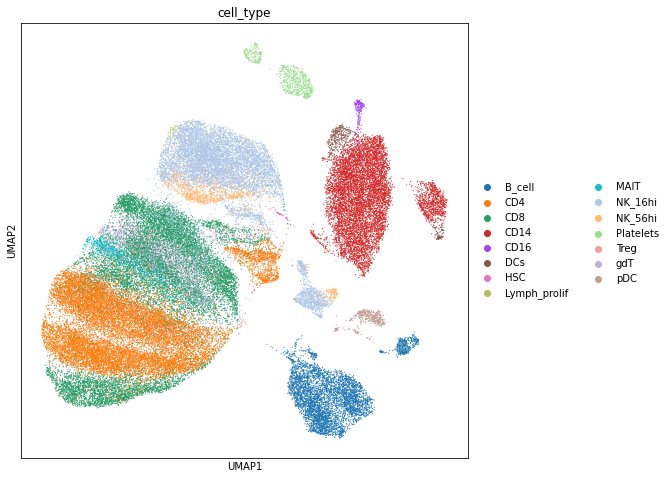

In [22]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = 'cell_type', s = 5)

In [23]:
adata.write_h5ad('data_saved/scvi_cd16.h5ad')

# Two different samples

In [1]:
import scvi
import scanpy as sc
import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

Global seed set to 0


In [24]:
def pp(adata, ids):    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    adata.obs['Sample'] = ids
    if ids == 'lung':
        adata.obs['cell_type'] = 'lung_na'
        
    adata = adata[~adata.obs.cell_type.isna()]
    
    return adata

In [25]:
adata = sc.concat([pp(sc.read_10x_mtx('two_different/lung/'), 'lung'),
                   pp(sc.read_h5ad('two_different/muscle.h5ad'), 'muscle')], index_unique='_')

/tmp/ipykernel_64151/3905731382.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = ids
/tmp/ipykernel_64151/3905731382.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = ids


In [26]:
adata[adata.obs.cell_type.isna()].obs

,n_genes,n_genes_by_counts,total_counts,Sample,cell_type


In [27]:
sc.pp.filter_genes(adata, min_cells = 10)

In [28]:
adata.layers['counts'] = adata.X.copy()

In [29]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset = True, layer = 'counts',
                           flavor = "seurat_v3", batch_key= "Sample") #no batch_key if one sample

In [30]:
adata

AnnData object with n_obs × n_vars = 16936 × 3000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'Sample', 'cell_type'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg'
    layers: 'counts'

In [31]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Sample,cell_type
AAACCCAAGACCAACG-1_0,547,547,890.0,lung,lung_na
AAACCCAAGCAACAAT-1_0,1709,1709,4205.0,lung,lung_na
AAACCCAAGGAGGGTG-1_0,1108,1108,1912.0,lung,lung_na
AAACCCAAGGTCCCTG-1_0,3801,3801,13180.0,lung,lung_na
AAACCCACAACGCATT-1_0,2302,2302,5953.0,lung,lung_na
...,...,...,...,...,...
TTTGGTTGTCGGTACC-1_1,4164,4164,15231.0,muscle,Fibroblast_1
TTTGTTGAGTCAACAA-1_1,1743,1743,5202.0,muscle,Fibroblast_1
TTTGTTGGTAATCAGA-1_1,1816,1816,6264.0,muscle,Myoblast
TTTGTTGTCCAGCACG-1_1,2439,2439,6729.0,muscle,Fibroblast_1


In [32]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['total_counts'])


model = scvi.model.SCVI(adata)

adfsdfsdf
adfsdfsdf


In [33]:
model.train()

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 400/400: 100%|███████| 400/400 [05:33<00:00,  1.20it/s, loss=981, v_num=1]


In [34]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [35]:
sc.tl.leiden(adata, resolution = 0.5)

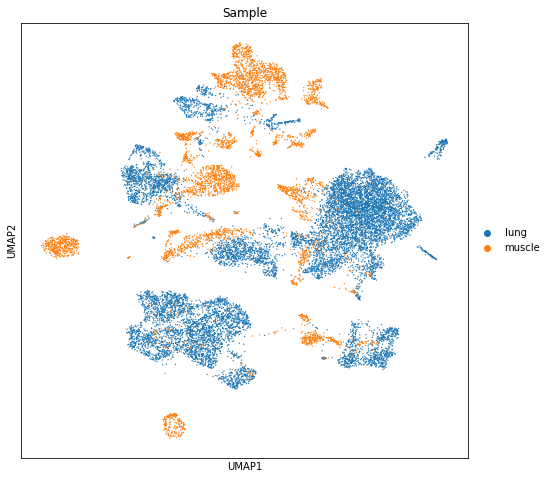

In [36]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['Sample'])

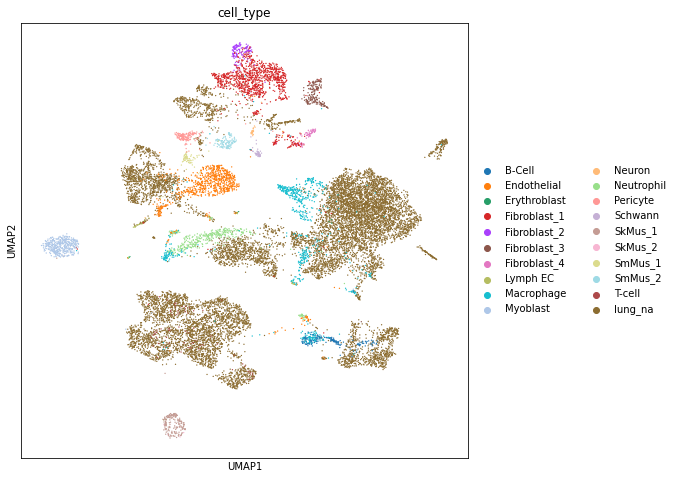

In [37]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['cell_type'])

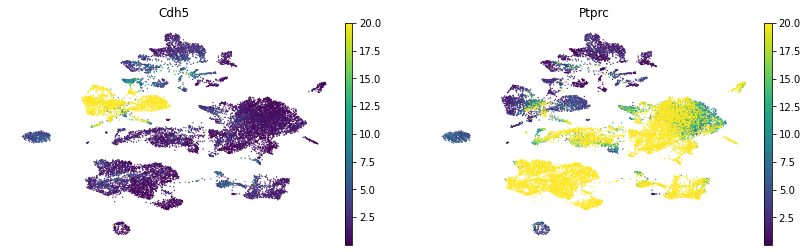

In [38]:
sc.pl.umap(adata, color = ['Cdh5', 'Ptprc'], frameon = False, layer = 'scvi_normalized', vmax = 20)


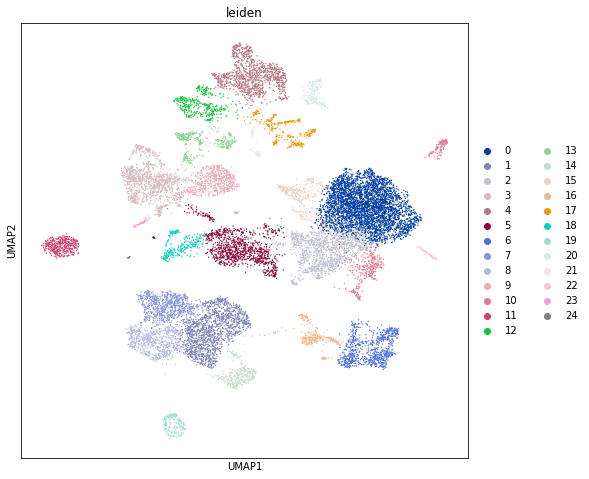

In [39]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['leiden'])

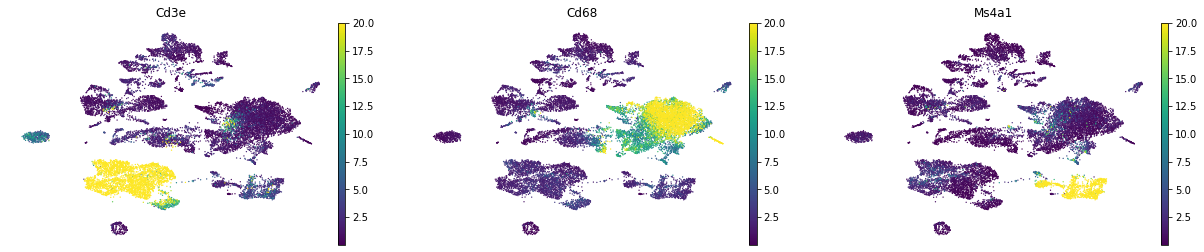

In [41]:
sc.pl.umap(adata, color = ['Cd3e', 'Cd68', 'Ms4a1'], frameon = False, layer = 'scvi_normalized', vmax = 20)

# PBMC batches

In [1]:
ls pbmc_batches

DGE.mtx
GSM3169075_filtered_gene_bc_matrices_h5.h5
pbmc_10k_v3_filtered_feature_bc_matrix.h5


In [2]:
import scvi
import scanpy as sc
import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

Global seed set to 0


In [4]:
test = sc.read_mtx('pbmc_batches/DGE.mtx')

In [11]:
test.var_names = pd.read_csv('pbmc_batches/genes.csv')['gene_name']

In [12]:
test

AnnData object with n_obs × n_vars = 67322 × 58395

In [13]:
test.var

""
gene_name
TSPAN6
TNMD
DPM1
SCYL3
C1orf112
...
AC104389.6
AC010616.2
AL034430.1


In [14]:
sc.pp.filter_cells(test, min_genes=300)

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
test.obs

,n_genes
0,11061
1,9156
2,8728
3,8433
4,8479
...,...
67317,911
67318,716
67319,925
67320,915


In [81]:
def a(path):
    adata = sc.read_10x_h5(path)
    adata.var_names_make_unique()
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    adata.obs['Sample'] = path.split('/')[1].split('_')[0]
    adata.obs['tech'] = '10x'
    
    return adata

def b(path, thing):
    adata = sc.read_csv(path, delimiter='\t').T
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    adata.obs['Sample'] = thing
    adata.obs['tech'] = 'smart'
    
    return adata    
    

In [93]:
adata = sc.concat([a('pbmc_batches/pbmc_10k_v3_filtered_feature_bc_matrix.h5'),
           a('pbmc_batches/GSM3169075_filtered_gene_bc_matrices_h5.h5')]) #,
           #b('pbmc_batches/GSE94820_raw.expMatrix_DCnMono.discovery.set.submission.txt', 'DCnMono'),
           #b('pbmc_batches/GSE94820_raw.expMatrix_deeper.characterization.set.submission.txt', 'deeper')])

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_9832/73755142.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1].split('_')[0]
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the m

In [94]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Sample,tech
AAACCCAAGCGCCCAT-1,1087,1087,2204.0,pbmc,10x
AAACCCACAGAGTTGG-1,1836,1836,5884.0,pbmc,10x
AAACCCACAGGTATGG-1,2216,2216,5530.0,pbmc,10x
AAACCCACATAGTCAC-1,1615,1615,5106.0,pbmc,10x
AAACCCACATCCAATG-1,1800,1800,4572.0,pbmc,10x
...,...,...,...,...,...
TTTGTCACATCGGAAG-1,523,523,1083.0,GSM3169075,10x
TTTGTCAGTACTCAAC-1,1162,1162,2997.0,GSM3169075,10x
TTTGTCAGTAGTACCT-1,956,956,2105.0,GSM3169075,10x
TTTGTCAGTGCAACGA-1,1269,1269,4297.0,GSM3169075,10x


In [95]:
sc.pp.filter_genes(adata, min_cells = 100)

adata.layers['counts'] = adata.X.copy()


sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset = True, layer = 'counts',
                           flavor = "seurat_v3", batch_key= "Sample") #no batch_key if one sample



scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['total_counts'])


model = scvi.model.SCVI(adata)

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


adfsdfsdf
adfsdfsdf


/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [96]:
model.train() 


/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 400/400: 100%|███████| 400/400 [04:34<00:00,  1.46it/s, loss=865, v_num=1]


In [97]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [100]:
sc.tl.leiden(adata, resolution = 0.5)

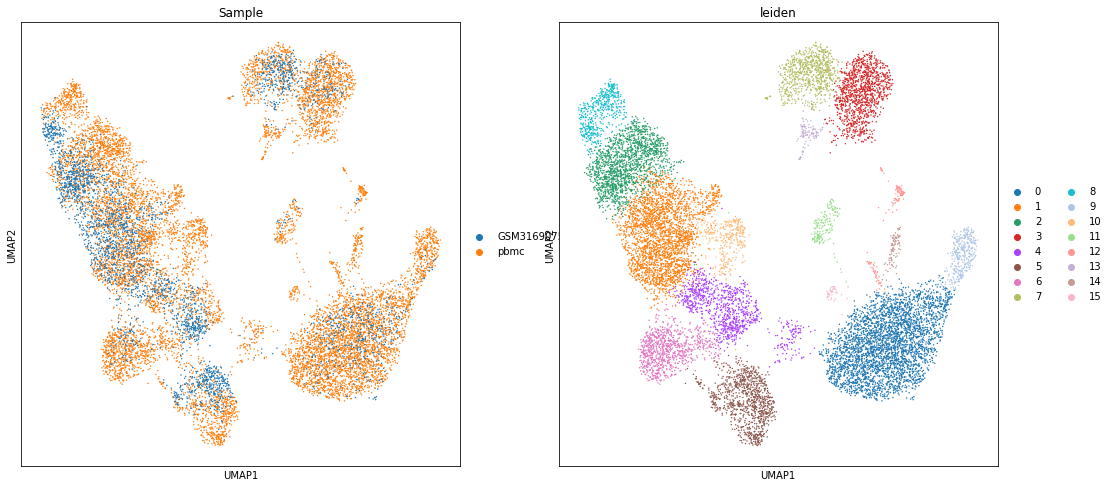

In [101]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['Sample', 'leiden'])

In [79]:
temp = b('pbmc_batches/GSE94820_raw.expMatrix_deeper.characterization.set.submission.txt', 'deeper')

/tmp/ipykernel_9832/1833640397.py:22: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = thing


In [80]:
temp.X

array([[  0.  ,   0.  ,   0.  , ..., 412.79,   0.  ,  83.86],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 106.95],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   6.01,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,  57.68,  16.24,  15.86]],
      dtype=float32)

In [71]:
adata.var

,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,highly_variable_nbatches
FAM41C,360,True,554.0,0.113995,16.893042,1.108354,1
KLHL17,299,True,844.0,0.137173,11.765975,1.170025,1
PLEKHN1,121,True,707.0,0.072891,21.477082,1.311685,1
HES4,638,True,246.0,0.199557,24.806504,2.342158,4
ISG15,5669,True,482.0,17.939759,16450.956795,2.221859,4
...,...,...,...,...,...,...,...
TRPM2,815,True,657.0,1.373132,325.946987,1.262724,1
ADARB1,1208,True,938.0,0.346577,40.799339,1.261591,1
COL6A2,783,True,594.0,0.079301,0.742471,1.276158,2
MCM3AP-AS1,437,True,241.0,0.368818,73.581010,1.371416,1


In [73]:
temp = a('pbmc_batches/pbmc_10k_v3_filtered_feature_bc_matrix.h5')

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_9832/1833640397.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1].split('_')[0]


In [78]:
temp.X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)